In [1]:
#candidate number-277244

# INTRODUCTION

The most popular uses include **content-based recommender systems**, **duplicate or plagiarism detection**, and **clustering**.
In this report, I will discuss about mainly two document similarity methods-**Cosine similarity** and **jaccard similarity**. I will also discuss about the time complexity of this measurement theoretically and emperically. After that, I will discuss about **all pairs similarities** and I will apply jaccard all pairs similarity in parallel computing. Lastly, I will check the cosine similarities using strassen multiplication.  I will also discuss about the time complexity of this measurement theoretically and emperically for all of the items. Here I am using **"file.csv"** file for getting the data matrix. I also created two files **defs.py** and **defs2.py** mainly for parallel computing which I will import later.

In [2]:
#importing some basic library for now.
import pandas as pd
import numpy as np
import time
import random
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('file.csv', index_col=0)

In [4]:
df.shape

(21155, 20)

In [5]:
df1=df.iloc[:1000] #extracting subset of rows
df1.head()

doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11  \
A        0     6     5     7     9    13    16    12    14     22     17   
A-tu     0     0     0     0     0     0     0     0     0      0      0   
A.       0     0     0     0     0     0     0     0     0      0      0   
ABC      0     0     0     0     1     0     0     0     0      0      0   
Aah      0     0     0     0     0     0     0     0     0      0      1   

      doc12  doc13  doc14  doc15  doc16  doc17  doc18  doc19  doc20  
A        27     32     17     28     28     47     41     35     32  
A-tu      0      3      0      0      0      0      0      0      0  
A.        2      0      0      0      0      0      0      0      0  
ABC       0      0      0      0      0      0      0      0      0  
Aah       0      0      0      0      0      0      0      0      0

In [6]:
df_values=df1.values
df_values
#numpy.ndarray- we created a numpy.ndarray from the data

array([[ 0,  6,  5, ..., 41, 35, 32],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  1,  5],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [7]:
df_list = df_values.tolist()
df_list

[[0, 6, 5, 7, 9, 13, 16, 12, 14, 22, 17, 27, 32, 17, 28, 28, 47, 41, 35, 32],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 2, 0, 1, 0, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
samples = list(map(int, np.linspace(50, 1000, 100)))
samples1=list(map(int,np.linspace(50,20,10000)))#larger samples
#samples-It generates an array of 100 evenly spaced values between 50 and 1000 (inclusive). 
#The third argument, 100, specifies the number of samples.Converting the result into a list

In [9]:
samples_doc = [random.sample(df_list,s) for s in samples]
samples_doc_1 = [random.sample(df_list,s) for s in samples]
samples_doc_2=[random.sample(df_list,s) for s in samples1]
#This function selects s unique random elements from the df1_list list.
#This is a list comprehension that creates a list of random samples for each sample size in the samples list.


Sublists of random samples will be included in this list; each sublist will correspond to a different sample size that is listed in the samples list.

In [10]:
samples_doc_1

[[[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 7, 0, 0, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [11]:
print(type(samples_doc_2))

<class 'list'>


I am creating make_freq_dist function where I am taking a list of list (doclists). It will iterate through each list and convert it to a tuple. This will act as a key in the dictionary. The value is the frequency of that tuple in the doclist. If the tuple is present in the dictionary it will increment the count and otherwise it will ba count of 1.

In [12]:
#lab work
def make_freq_dict(doclists):
    my_dict = {}
    for item in doclists:
        # Convert the list to a tuple before using it as a key
        item_tuple = tuple(item)
        my_dict[item_tuple] = my_dict.get(item_tuple, 0) + 1
    return my_dict
#create_collection_samples will return a list of dictionary
def create_collection_samples(samples):
    docs = []
    for words in samples:
        docs.append(make_freq_dict(words))
    return docs

docs_list = create_collection_samples(samples_doc)
docs_list_1 = create_collection_samples(samples_doc_1)
docs_list_2=create_collection_samples(samples_doc_2)



In [13]:
docs_list_1 #list of dictionary

[{(0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0): 1,
  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 2,
  (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 2,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 3,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 3,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 7, 0, 0, 0, 1, 1, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0): 2,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 3,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 1,
  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0)

In [14]:
#time function
#taken from lab work
#It will be useful during time complexity analysis
def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(repeats**0.5)
    return ans,mean,error

# Q1. 

## Cosine Similarity 

It is a mathematical concepts called cosine similarity  which is used to compare similarity of two vectors.


\begin{gather*}
cos(A,B)=\frac{A.B}{ \sqrt{A.A*B.B}}
\end{gather*}

- A and B are the two vectors. A.B are the dot product of this two vectors. 


In [15]:
#taken from cosine similarity lab work
#I am creating make_matrix function where I took list of dictionary as input.
#This will return a transpose of a matrix.
#The code below will turn the dictionary representation of documents into a characteristic matrix
def make_matrix(list_of_dicts):
    all_features = {}    
    for doc_dict in list_of_dicts:
        for feat in doc_dict.keys():
            all_features[feat] = 1
    
    dimensions = list(all_features.keys())
    sorted(dimensions)
    
    matrix = []
    for dimension in dimensions:
        row = []
        for doc_dict in list_of_dicts:
            row.append(doc_dict.get(dimension, 0))
        matrix.append(row)
        


    transposed = []
    for i in range(0, len(matrix[0])):
        transposed.append([row[i] for row in matrix])
    return transposed

In [16]:
#cosine similarity code-lab
import math

def dot(v1,v2):
    total=0
    for i in range(0,len(v1)):
        total+=v1[i]*v2[i]
        
    return total

def cosine(v1,v2):
    
    return dot(v1,v2)/math.sqrt(dot(v1,v1)*dot(v2,v2))

## 1.1 Present an analysis of the theoretical running time of the cosine similarity measure applied to a pair of documents with data in the format of the provided data matrix.

- As I can see in the above cosine code,there are two functions-**dot()** and **cosine()**. V1 and V2 are two vectors.
- **dot()** function is used to calculate dot product of two vectors. The loop is running n times-n is vector length. The complexity of dot function will be **O(n)**.
- **cosine** uses dot function three times. One during numerator and two times in denominator -> (O(3n)). math.sqrt() takes a constant time O(1). so overall time complexity of the cosine_similarity is **O(n)**


In [17]:
doc_vectors=[make_matrix([d]) for d in docs_list_1] #list of vectors
# doc_vectors

In [18]:
times_cosine_sim=[]
for i in range(len(docs_list_1)):
    times_cosine_sim.append(timeit(cosine,doc_vectors[i][0],doc_vectors[i][0])[1])

In [19]:
xs=[len(d) for d in docs_list_1]

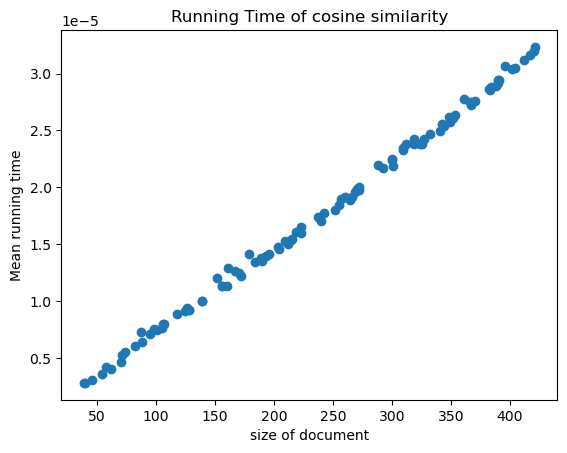

In [20]:
plt.scatter(xs,times_cosine_sim)
plt.title('Running Time of cosine similarity')
plt.xlabel('size of document')
plt.ylabel('Mean running time')
plt.show()

## 1.2 Test your analysis empirically by timing and plotting various calculations of cosine similarity on your computer. Estimate the key constant in the formula for the run-time, for your implementation and computer. 

If $y=c_a.x^\alpha$ then it follows that:
$$\log(y) = \log(c_a) + \alpha \log(x)$$
so if we plot a graph of $\log(y)$ against $\log(x)$ the gradient will be $\alpha$ and the y intercept will be $\log(c_a)$

I calculate the slope and constant below. slope is coming around 1.0 which means it should be O($n^{1}$). Also the constant  $c_a$ for the computation is of the order of  $10^{-16}$.

So, emperically I can write the function as      y=$10^{−16}$ $x^{1}$

-y is runtime of function


-x is length of vectors





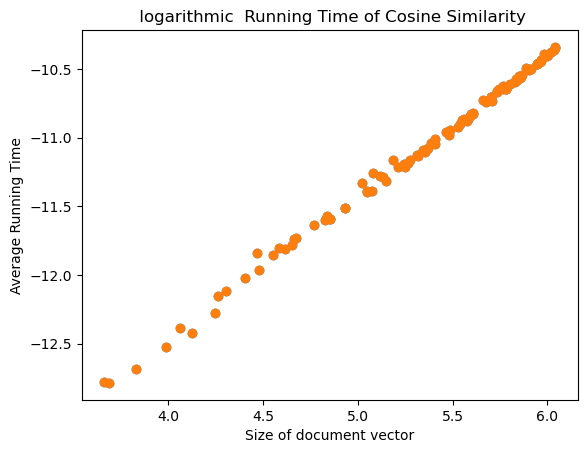

In [21]:
logxs=[np.log(x) for x in xs]
logys=[np.log(y) for y in times_cosine_sim]
plt.scatter(logxs,logys)
plt.scatter(logxs,logys)
plt.title(' logarithmic  Running Time of Cosine Similarity')
plt.xlabel('Size of document vector')
plt.ylabel('Average Running Time')
plt.show()

In [22]:

import scipy.stats as stats
res = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))


Slope is 1.02394260261288 and intercept is -16.55109995241288


## 1.3 Compare using the implementation of the dot product in numpy with your own implementation.

The numpy implementation is faster than cosine_similarity as the time complexity to acess an element in an numpy array by using numpy is O(1). There are 3 dot product usage.The complexity of a dot product between two vector of length n is O(n).Therefore the overall timecomplexity is **O(n)**.

**numpy implementation is around O(n) but more faster than cosine without numpy.**

In [23]:
def cosine_similarity_numpy(v1,v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.dot(v1,v2) / (np.sqrt(np.dot(v1,v1)) * np.sqrt(np.dot(v2,v2)))

In [24]:
times_cosine_numpy = []
for i in range(len(docs_list)):
      times_cosine_numpy.append(timeit(cosine_similarity_numpy, doc_vectors[i][0], doc_vectors[i][0])[1])

In [25]:
xs_numpy=[len(d) for d in docs_list]

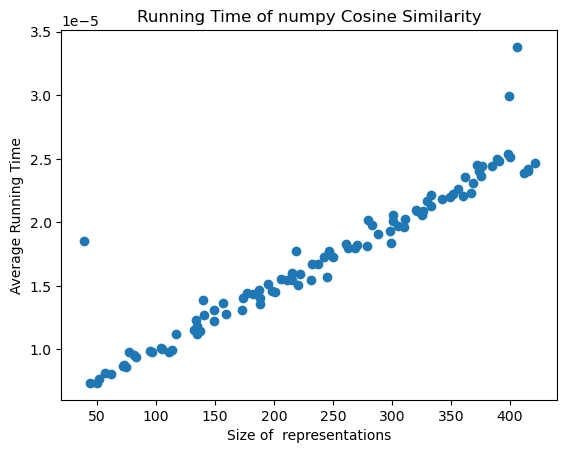

In [26]:
plt.scatter(xs_numpy,times_cosine_numpy)
plt.title('Running Time of numpy Cosine Similarity')
plt.xlabel('Size of  representations')
plt.ylabel('Average Running Time')
plt.show()

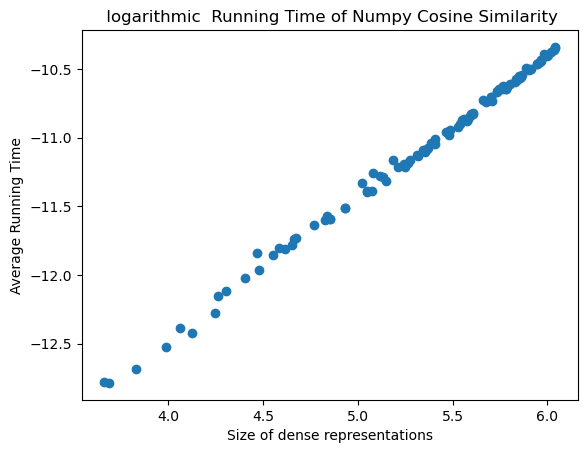

In [27]:
logxsnumpy=[np.log(x) for x in xs_numpy]
logysnumpy=[np.log(y) for y in times_cosine_numpy]
plt.scatter(logxs,logys)
plt.title(' logarithmic  Running Time of Numpy Cosine Similarity')
plt.xlabel('Size of dense representations')
plt.ylabel('Average Running Time')
plt.show()

In [28]:

import scipy.stats as stats
res = stats.linregress(logxsnumpy, logysnumpy)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 0.5511500376663495 and intercept is -13.972533869120225


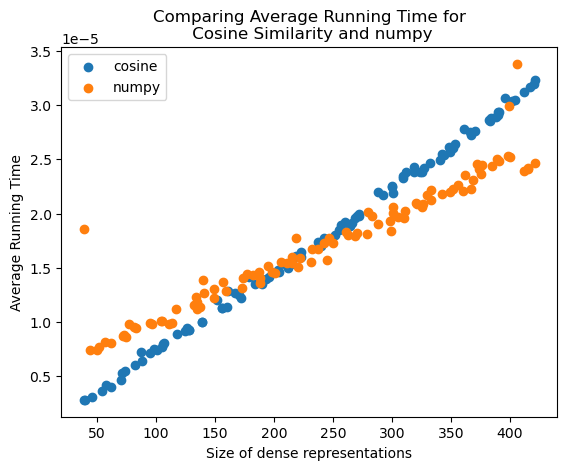

In [29]:
plt.scatter(xs, times_cosine_sim, label='cosine')
plt.scatter(xs_numpy, times_cosine_numpy, label='numpy')
plt.title('Comparing  Running Time for\n Cosine Similarity and numpy')
plt.xlabel('Size of dense representations')
plt.ylabel('Average Running Time')
plt.legend(loc='best')
plt.show()

slope for numpy is coming around 0.6 which means it should be **O($n^{0.5}$)$\approx$ O(n)**.
Also the constant  $c_a$ for the computation is of the order of  $10^{-14}$.

Emperically, I can see numpy cosine is more faster than the cosine. I can write the function as  

y=$10^{−14}$ $x^{0.5}$

 

# Q2. 
## Jaccard Similarity 

Jaccard's similarity is a concept which is used to find similarity between bags of words. It is the ratio of common elements in the set (intersection) and to the union of two sets(union).
                     
                     

\begin{gather*}
J(A,B)=\frac{|A\cap B|}{|A \cup B|}
\end{gather*}

- ${|A\cap B|}$ is the number of elements after intersection of two sets A and B. 
- ${|A \cup B|}$ is the number of element after union of two sets A and B

In [30]:
## jaccard-lab work

def maketotal(dict1):
    total = 0
    for item in dict1.values():
        total += item
    return total

def jaccard(dict1, dict2):
    intersection = {}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item] = min(dict1[item], dict2[item])

    intersectiontot = maketotal(intersection)
    union = maketotal(dict1) + maketotal(dict2) - intersectiontot
    return intersectiontot / union 
print(jaccard(docs_list[1],docs_list[6]))
print(jaccard(docs_list[1],docs_list_2[5]))
print(jaccard(docs_list[1],docs_list[1])) #same document

0.2028985507246377
0.1368421052631579
1.0


## Q2.1 Present an analysis of the theoretical running time of Jaccard’s similarity measure applied to a pair of documents with data in the format of the provided data matrix.

- dict1,dict2- two dictionary.

- The **maketotal()** function iterate over the values of dictionary and sums them. Its timecomplexity is **𝑂(n)**

- The **Jaccard()** function iterates over the key of two dictionaries to find the intersection . Then I am doing the union of this two dictionaries. its worst case running time is **𝑂(n)**. The final step is to divide the intersection and union. 

- Now if both sets are same,their similarity is 1. If it's completely different, then similarity is 0 which is a worst case scenario where loop will iterate over all the words in second list. In that scenario,time complexity is quardratic **𝑂($n^2$)**. As the size of dictionary increases,there's a chance of increase in collision which may result in increase of execution time.

In [31]:
times_jaccard=[]
for i in range(len(docs_list)):
    times_jaccard.append(timeit(jaccard,docs_list[i],docs_list[i])[1])

In [32]:
xs_jaccard=[len(d) for d in docs_list]

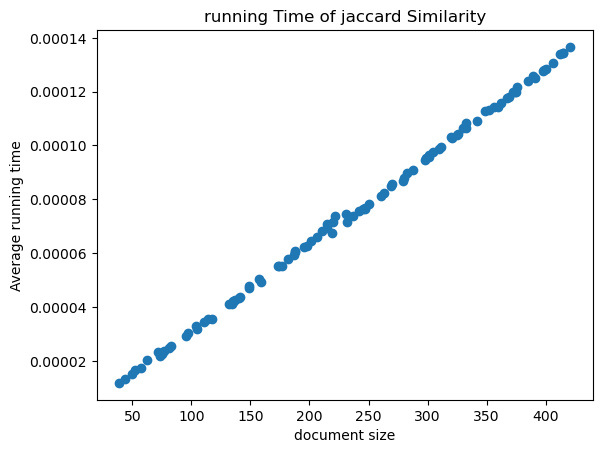

In [76]:
plt.scatter(xs_jaccard,times_jaccard)
plt.title('running Time of jaccard Similarity')
plt.xlabel('document size')
plt.ylabel('Average running time')
plt.show()

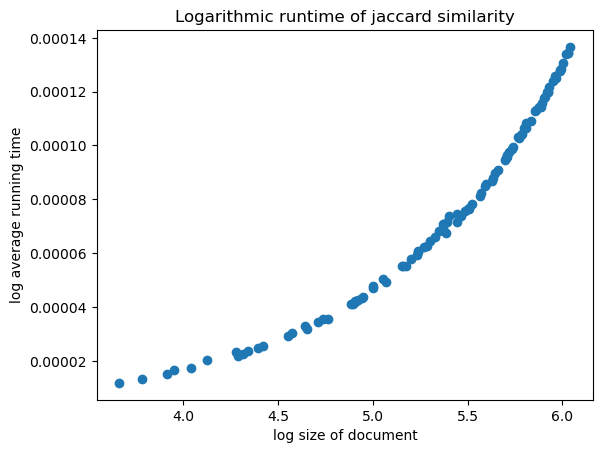

In [34]:
logxsjac=[np.log(x) for x in xs_jaccard]
logysjac=[np.log(y) for y in times_jaccard]
plt.scatter(logxsjac,times_jaccard)
plt.title('Logarithmic runtime of jaccard similarity')
plt.xlabel('log size of document')
plt.ylabel('log average running time')
plt.show()

In [35]:
import scipy.stats as stats
res = stats.linregress(logxsjac, logysjac)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 1.0240498552502328 and intercept is -15.094776586416167


## Q2.1 Test your analysis empirically by timing and plotting various calculations of Jaccard similarity on your computer. Estimate the key constant in the formula for the run-time, for your implementation and computer.


I calculate the slope and constant below. slope is coming around 1.0 which means it should be 

O($n^{1.0}$) $\approx$ O(n).

Also the constant  $c_a$ for the computation is of the order of  $10^{-15}$.

So, emperically,function is
y=$10^{−15}$ $x^{1}$


# Q3 

## All Pairs similarity 
  
- I created a function **all_pairs_similarities()** which compute all pair similarity of document lists. Here we are taking docs (list of documents) and similarity as paramenter.
- There are three similarity-'jaccard','cosine' and 'cosine similarity numpy'. we are calling the function depending on the similarity which I will give.
- Here this function will iterate through all the documents(two for loops). So the time complexity in this case should be  O($n^{2}$)

In [60]:
#combining lab work execrcise 3 and 5 of unit6
def all_pairs_similarities(docs,similarity_measure):
    pairwise_sim=[]
    if similarity_measure=='jaccard':
        sim=jaccard
    elif similarity_measure=='cosine':
        sim=cosine
        docs=make_matrix(docs)
    elif similarity_measure=='cosine_similarity_numpy':
        sim=cosine_similarity_numpy
        docs=make_matrix(docs)
    else:
        return print('Invalid similarity')
    for doc1 in docs:
        for doc2 in docs:
            pairwise_sim.append(sim(doc1,doc2))
    return pairwise_sim

## 3.1 What is the theoretical worst-case running time for computing all-pairs similarities on a data matrix such as the one provided? Does it make a difference which similarity measure is being computed?

- The theoritical worst-case running time depends on the size of data(n). It checks every pairs of documents.
- For each similarity, the two loop iterate over every pairs of documents, resulting a time complexity of O($n^{2}$). So, the time complexity depends on size of dictionary list and size of individual dictionary. If the size of dictionary is very large the time complexity will be greater than O($n^{2}$)
- **The choice of the similarity make a difference and it should be consider based on size and charactaristic of data.One similarity measures may be appropriate than another one depending on the application we are using.Jaccard similarity suitable for data represented as a set or dictionary where as cosine similarity good for data as vectors.**

In [61]:
print(all_pairs_similarities(docs_list_1,similarity_measure='cosine_similarity_numpy'))

[0.9999999999999998, 0.5764319446554305, 0.5477519994143714, 0.5348628216667475, 0.5549267431802429, 0.5938966057274394, 0.5487789182888689, 0.5780703616471792, 0.5944454429259127, 0.6231166313646151, 0.5930458724362114, 0.5487076359381069, 0.5751967333454546, 0.6759263694193746, 0.6316692857073917, 0.6797954656300366, 0.6380501888344519, 0.6429330953428226, 0.7176339700700594, 0.6736609988862632, 0.6995883230331705, 0.6791851285948325, 0.6829669884366187, 0.6481592972655341, 0.6465777691085848, 0.6399365357157772, 0.6633363576596261, 0.6517520955998325, 0.677090474932861, 0.6734914736984796, 0.6575947112625231, 0.6669813930879667, 0.7111131285576164, 0.6895412463278343, 0.6578596628452652, 0.6818009431826441, 0.6934114190700217, 0.692211486618064, 0.6864926687304841, 0.676913742331615, 0.67627370352987, 0.70226734461771, 0.6488127132161889, 0.6507004960809208, 0.6727553553659299, 0.680577266071834, 0.6686006262753973, 0.6400402638868423, 0.6716552564952215, 0.6793680322435488, 0.67777

In [62]:
print(all_pairs_similarities(docs_list_1,similarity_measure='jaccard'))

[1.0, 0.2247191011235955, 0.1782178217821782, 0.21904761904761905, 0.1694915254237288, 0.1951219512195122, 0.18045112781954886, 0.176056338028169, 0.16556291390728478, 0.14814814814814814, 0.15384615384615385, 0.1452513966480447, 0.14361702127659576, 0.14285714285714285, 0.14146341463414633, 0.14084507042253522, 0.16589861751152074, 0.11914893617021277, 0.12863070539419086, 0.13709677419354838, 0.11923076923076924, 0.10661764705882353, 0.11071428571428571, 0.10726643598615918, 0.1111111111111111, 0.11513157894736842, 0.10443037974683544, 0.09451219512195122, 0.10510510510510511, 0.09565217391304348, 0.10888252148997135, 0.0997229916897507, 0.10298102981029811, 0.09762532981530343, 0.08673469387755102, 0.08478802992518704, 0.09068627450980392, 0.08591885441527446, 0.08158508158508158, 0.08466819221967964, 0.08783783783783784, 0.08590308370044053, 0.07249466950959488, 0.06889352818371608, 0.08298755186721991, 0.07272727272727272, 0.06286836935166994, 0.07827788649706457, 0.07485604606525

In [63]:
print(all_pairs_similarities(docs_list_1,similarity_measure='cosine'))

[1.0, 0.5764319446554306, 0.5477519994143715, 0.5348628216667475, 0.5549267431802432, 0.5938966057274395, 0.548778918288869, 0.5780703616471792, 0.5944454429259128, 0.6231166313646153, 0.5930458724362115, 0.548707635938107, 0.5751967333454546, 0.6759263694193746, 0.6316692857073918, 0.6797954656300366, 0.6380501888344521, 0.6429330953428226, 0.7176339700700596, 0.6736609988862633, 0.6995883230331706, 0.6791851285948325, 0.6829669884366187, 0.6481592972655342, 0.6465777691085849, 0.6399365357157775, 0.6633363576596262, 0.6517520955998325, 0.6770904749328611, 0.6734914736984797, 0.6575947112625232, 0.6669813930879668, 0.7111131285576165, 0.6895412463278344, 0.6578596628452652, 0.6818009431826442, 0.6934114190700218, 0.692211486618064, 0.6864926687304841, 0.6769137423316152, 0.67627370352987, 0.7022673446177101, 0.648812713216189, 0.6507004960809211, 0.6727553553659299, 0.6805772660718341, 0.6686006262753973, 0.6400402638868424, 0.6716552564952217, 0.6793680322435489, 0.6777777520888234, 

In [64]:

samples1=list(map(int,np.linspace(1,100,20)))
docs_news_samples_1=[random.sample(docs_list_2,s) for s in samples1]

In [65]:
times_all_pairs_jaccard=[]
times_all_pairs_cosine=[]
times_all_pairs_numpy=[]
for d in docs_news_samples_1:
    times_all_pairs_jaccard.append(timeit(all_pairs_similarities,d,'jaccard',repeats=2)[1])
    times_all_pairs_cosine.append(timeit(all_pairs_similarities,d,'cosine',repeats=2)[1])
    times_all_pairs_numpy.append(timeit(all_pairs_similarities,d,'cosine_similarity_numpy',repeats=2)[1])
    

In [42]:
xs_aps=[len(d) for d in docs_news_samples_1]

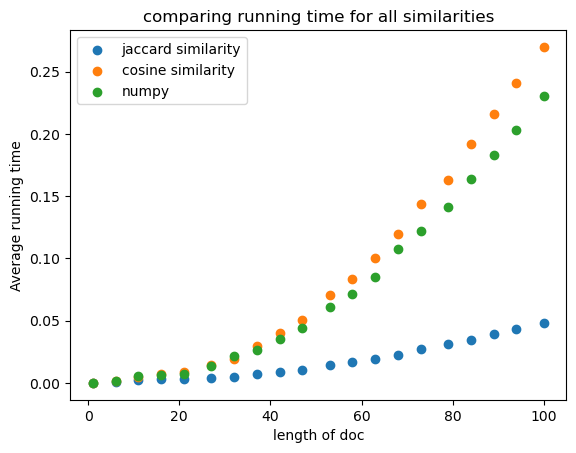

In [75]:
plt.scatter(xs_aps,times_all_pairs_jaccard,label='jaccard similarity')
plt.scatter(xs_aps,times_all_pairs_cosine,label='cosine similarity')
plt.scatter(xs_aps,times_all_pairs_numpy,label='numpy')
plt.title('comparing running time for all similarities')
plt.xlabel('length of doc')
plt.ylabel('Average running time')
plt.legend(loc='best')
plt.show()

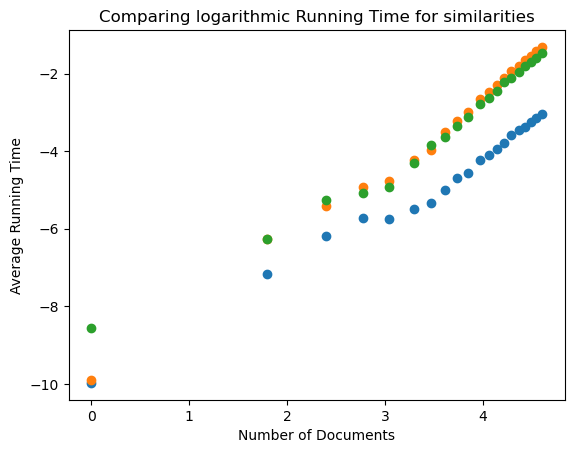

In [77]:
logxs2aps=[np.log(x) for x in xs_aps]
logys_jac=[np.log(y) for y in times_all_pairs_jaccard]
logys_cosine=[np.log(y) for y in times_all_pairs_cosine ]
logys_numpy=[np.log(y) for y in times_all_pairs_numpy]
plt.scatter(logxs2aps, logys_jac, label='jaccard')
plt.scatter(logxs2aps, logys_cosine, label='cosine_dense')
plt.scatter(logxs2aps, logys_numpy, label='cosine_numpy')
plt.title('Comparing logarithmic Running Time for similarities')
plt.xlabel('Number of Documents')
plt.ylabel('Average Running Time')
plt.show()

##  3.2 Estimate the key constant in the all-pairs similarity run-time formula for both Jaccard and cosine similarity.

(see the graph above) let's assume we have 500 documnets/matrix.

**For all pair Jaccard:**

I calculate the slope and constant below. slope is coming around 1.81 which means it should be O($n^{1.81}$). I can say it is less than O($n^2$). 

But if we increase the size of the document, it will tend to O($n^2$).
Also the constant  $c_a$ for the computation is of the order of  $10^{-11}$.

So, emperically I can write the function as  
y=$10^{−11}$ $500^{1.77}$ =5.9865*$10^{-08}$


**For all pair cosine**

Slope is coming around 2.21 which means it should be O($n^{2.21}$). If we increase the size of document it will  be around O($n^3$).The constant $c_a$ for the computation is of order of $10^{-11}$.

y=$10^{−11}$ $500^{2.21}$=9.2*$10^{-07}$

**For all pair cosine numpy**

Slope is coming around 2.0 which means it should be O($n^{2.0}$). If we increase the size of document it will  tend to more than O($n^2$).The constant $c_a$ for the computation is of order of $10^{-11}$.


y=$10^{−11}$ $500^{2.0}$=2.5*$10^{-07}$

I can assume that for large document worst case running time of all pair similarity will be around or more than O($n^2$). **As I can see, There is huge difference in running time based on the algorithm chosen.**


In [45]:
res = stats.linregress(logxs2aps, logys_jac)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 1.7952579066581165 and intercept is -11.370236459799784


In [46]:
res = stats.linregress(logxs2aps, logys_cosine)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 2.2064231517130275 and intercept is -11.520026824259405


In [47]:
res = stats.linregress(logxs2aps, logys_numpy)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 2.025152008615836 and intercept is -10.874096458827733


# Q4.  Write a function that implements all-pairs similarities for one of the similarity measures, using some form of parallel computing. 




In [48]:
#importing files defs.py and defs2.py
#defs.py-all pair jaccard similarity code
#defs2.py-work_that_CPU code
import defs
import defs2
import multiprocessing
from multiprocessing import Pool

In [49]:
#lab work modified
def core_investigation(num_repeats,num_processes,num_loops):
    a=math.floor(num_repeats/num_processes)
    
    for i in range(a):
        inputs=[(docs_list_1,'jaccard')]*num_processes
        pool_of_processes=Pool(processes=num_processes)
        xs=pool_of_processes.map(defs.all_pairs_similarities_wrapper,inputs)
        pool_of_processes.close()
        
    inputs=[num_loops]*(num_repeats-a*num_processes)
    pool_of_processes=Pool(processes=num_processes)
    pool_of_processes.map(defs2.work_that_CPU,inputs)
    pool_of_processes.close()

In [50]:
multiprocessing.cpu_count() #finding number of cores

8

In [51]:
#lab work
times=[]

for p in range(1,21):
    starttime=time.time()
    
    core_investigation(20,p,10000000)#passing the function here
    
    endtime=time.time()
    timetaken=endtime-starttime
    
    times.append(timetaken)
    print(p)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


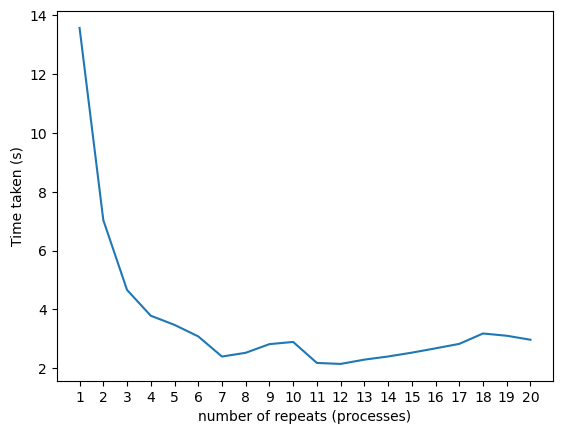

In [52]:
#lab work
import matplotlib.pyplot as plt
c=[]
for p in range(1,21):
    c.append(p)

plt.plot(c,times)
plt.xlabel("number of repeats (processes)")
plt.ylabel("Time taken (s)")
plt.xticks(c)
plt.show()
#graph plot between number of process and time taken for speedup analysis

##  4.1 Analyse theoretically and empirically how much speed up it is possible to achieve on your computer.


SpeedUps can be achieved through parallel computing if the number of process and cores increase, execution time decreases. Apart from that, we will also consider the size of data matric, the number of process and algorithm we are applying. The relation between execution time and speedup is inverse i.e. as the speedup increase, execution time will decreases. The ability to run many parallel threads concurrently increase with core count, which help to decrease overall execution time. 

My system has 8 cores. so speedup acheived is $\frac{O(n^2)}{8}$ where O($n^2$) is the time complexity for all pair jaccard similarity. This indicates if the execution time decreases, speedup is achieved.

For emperical analysis, I plot the graph between number of process and execution time which indicate that speedup is acheived with an increase in process.


# Q5.In theory, for a sufficiently large data matrix, all-pairs cosine similarities can be computed more efficiently by making use of Strassen’s method for matrix multiplication. Investigate this empirically and discuss your findings with reference to the theory.

I created cosine_similarity_strassen() function where I passed the matrix. I used strassen method and naive method for calculate cosine all pairs in strassen and cosine. 

In naive matrix multiplication,resulting matrix is computed by doing product of a row of first matrix  and column of second matrix. As I am using 3iterations in the naivemult() its time complexity is **O($n^3$)**.

Strassen multiplication is more efficient as it reduces the recursive call into seven multiplications of smaller matrix. 



\begin{gather*}
T(n)=7T(\frac{n}{2})+O(n^2)
\end{gather*}
\begin{gather*}        
T(n)=O(n^{\log_2 7})=O(n^{2.81})
\end{gather*}


All_pair_cosine_similarities using naive will get **O($n^3$)** time complexity for larger matrix size.In that case, strassen matrix multiplication is more efficient.All_pairs_cosine similarities can be computed more efficiently by using strassen method because it is a divide and conquer method that can reduce the amount of time required to compute all pairs similarities for large data matrices. On the other hand, naive cosine similarity for computing all pairs has a time complexity of O($n^{3}$).Strassen method has a time complexity of **O($n^{2.81}$)**  which is faster than naive. This means that time required to compute all-pairs cosine similarities using strassen method grows logarithmically with size of matrix. So,Strassen menthod is good for all_pairs cosine similarities for large data matrix. The naive algorithm can be used for smaller data,but it can be inefficient for larger data sets.

Empericaly, I tried to find out and compare the time complexity of both strassen and naive cosine_similarity. Though the time complexity is more or less similar, but increasing the matrix size may give a complexity of O($n^{2.81}$) in strassen and O($n^{3}$) in naive. For strassen I am getting a time complexity of O($n^{2.44}$) and for naive method it is O($n^{2.48}$)


In [53]:
# #lab
def naivemult(A,B):

    (m,n) = np.shape(A)
        
    C = np.zeros([m,m])
    
    for i in range(m):
        for j in range(m):
            for k in range(m):
                C[i,j] += A[i,k] * B[k,j]
        
    return C
def segment(M):
    (mm,nn)=np.shape(M)
    n = int(mm/2)
    
    a=M[:n,:n]
    b=M[:n,n:]
    c=M[n:,:n]
    d=M[n:,n:]
    
    return (a,b,c,d)


def build(a,b,c,d):
    
    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])
    
    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d
            
    return C
    

def strassen(M1, M2):
    
    if len(M1) <= 45:
        return naivemult(M1,M2)
    
    (a,b,c,d) = segment(M1)

    #note: e g f h NOT e f g h 
    (e,g,f,h) = segment(M2)

    P1 = strassen(a, g-h)
    P2 = strassen(a+b, h)
    P3 = strassen(c+d,e)
    P4 = strassen(d,f-e)
    P5 = strassen(a+d,e+h)
    P6 = strassen(b-d,f+h)
    P7 = strassen(a-c,e+g)
    
    r = P5+P4-P2+P6
    s = P1+P2
    t = P3+P4
    u = P5-P3-P7+P1
    
    C = build(r,s,t,u)
    
    return C




In [54]:
def cosine_similarity_strassen(matrix):
    
    diagonal_elements = np.diag(matrix)

    sqrt_diagonal = np.sqrt(diagonal_elements)
    diagonal_matrix_sqrt=np.diag(sqrt_diagonal)
    diagonal_inv=np.linalg.inv(diagonal_matrix_sqrt)
    normalized_matrix = np.dot(np.dot(diagonal_inv,matrix),diagonal_inv)

    return normalized_matrix

In [55]:
matrix_sizes=[2**n for n in range(8,11)] 
print(matrix_sizes)


[256, 512, 1024]


In [69]:

means_strassen = []
xs_strassen=[]

for size in matrix_sizes:
    sub_matrix = np.random.rand(size, size)
    sub_matrix1=sub_matrix.T
    sub_matrix_strassen=strassen(sub_matrix1,sub_matrix)
    xs_strassen.append(size)
    means_strassen.append(timeit(cosine_similarity_strassen, sub_matrix_strassen)[1])
    

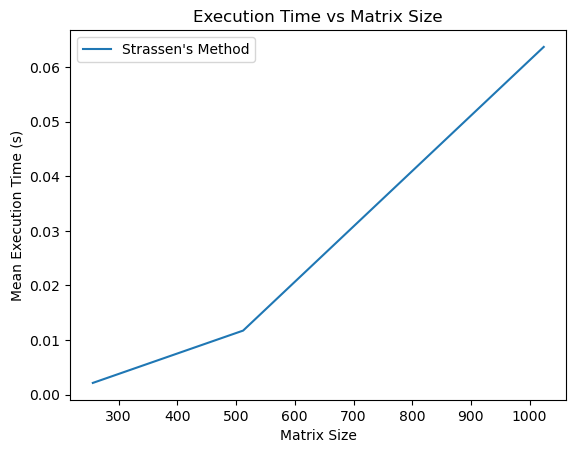

In [70]:
plt.plot(xs_strassen, means_strassen, label="Strassen's Method")
plt.xlabel('Matrix Size')
plt.ylabel('Mean Execution Time (s)')
plt.title('Execution Time vs Matrix Size')
plt.legend()
plt.show()

In [71]:
logxs_strassen=[np.log(x) for x in xs_strassen]
logys_strassen=[np.log(y) for y in means_strassen]

res = stats.linregress(logxs_strassen, logys_strassen)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 2.440144175590927 and intercept is -19.66789201914074


In [66]:

means_standard = []
xs_strassen=[]

for size in matrix_sizes:
    sub_matrix = np.random.rand(size, size)
    sub_matrix1=sub_matrix.T
    sub_matrix_standard=naivemult(sub_matrix1,sub_matrix)
    xs_strassen.append(size)
    means_standard.append(timeit(cosine_similarity_strassen, sub_matrix_standard)[1])

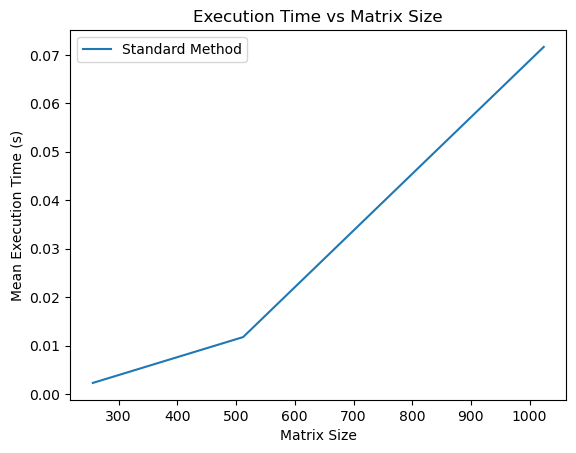

In [67]:
plt.plot(xs_strassen, means_standard, label="Standard Method")
plt.xlabel('Matrix Size')
plt.ylabel('Mean Execution Time (s)')
plt.title('Execution Time vs Matrix Size')
plt.legend()
plt.show()

In [68]:
logxs_strassen=[np.log(x) for x in xs_strassen]
logys_standard=[np.log(y) for y in means_standard]
res = stats.linregress(logxs_strassen, logys_standard)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 2.485015098527267 and intercept is -19.889328554989937


# conclusion:

Here I discuss about the theoretical and emperical analysis of time complexity of various similarity measure like jaccard, cosine , cosine numpy and all pairs similarity.In cosine,cosine_numpy and jaccard we are getting 𝑂(n) whereas all_pair took 𝑂($n^3$)  for cosine and 𝑂($n^2$) for jaccard and cosine_numpy as its iterates through all the pairs. I use jaccard to conduct all pairs similarity test using parallel computing. I can see with increase in number of cores, there is a decrease in execution time.
Lastly, I use strassen matrix multiplcation for cosine similarity to check if it is taking less time than cosine standard multiplication. Emperically, there is no such difference between cosine standard and cosine strassen but with increase in matrix size it may give better performance

In [74]:
filepath="ADS_assignment_similarity.ipynb"
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")


Submission length is 1957
